**Import the important Libraries.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.image as imread
import pathlib
import random
from shutil import copyfile
import cv2
import imghdr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

**Upload the Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

 97% 569M/586M [00:05<00:00, 109MB/s]
100% 586M/586M [00:05<00:00, 107MB/s]


In [ ]:
!unzip -qq /content/animals10.zip

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Get all the paths
data_dir_list =os.listdir('/content/raw-img')
print(data_dir_list)
path,dirs,files=next(os.walk("/content/raw-img"))
file_count= len(files)
file_count

['cane', 'elefante', 'ragno', 'mucca', 'gallina', 'gatto', 'farfalla', 'scoiattolo', 'cavallo', 'pecora']


0

In [ ]:
# Assuming the dataset is downloaded, extracted and path is assigned to dataset_path
dataset_path = '/content/raw-img/'

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('raw-img')

Found 26179 files belonging to 10 classes.


In [ ]:
path = '/content/raw-img/'
category = os.listdir(path)

data = {"imgpath": [], "labels": []}

for folder in category:
    folderpath = os.path.join(path, folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)

df = pd.DataFrame(data)

# Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

In [ ]:
df.sample(n=15, random_state=1)

,imgpath,labels,encoded_labels
21590,/content/raw-img/scoiattolo/OIP-DsuvS3PGxSLBGH...,scoiattolo,9
6337,/content/raw-img/ragno/OIP-60h22q21LMbtfY8ThlF...,ragno,8
6032,/content/raw-img/elefante/OIP-e8Guavd1y-ux_IgU...,elefante,2
22295,/content/raw-img/cavallo/OIP-cKD909tMafbJJsg6H...,cavallo,1
20032,/content/raw-img/scoiattolo/OIP-ZoYZzBjBgliTbl...,scoiattolo,9
12065,/content/raw-img/mucca/OIP-mCtqTFSURGE5dOrWj1s...,mucca,6
24262,/content/raw-img/cavallo/OIP-YbQn_uBUJ4m2fAf0T...,cavallo,1
7979,/content/raw-img/ragno/OIP-nZkrWACFH7FdETNe1hM...,ragno,8
11235,/content/raw-img/mucca/OIP-N6QXgv2JLlSD5h_aiRZ...,mucca,6
3811,/content/raw-img/cane/OIP-pRz-9O7wQ9kT4_51WjDS...,cane,0


In [ ]:
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique())

print("---------------------------------------")
print("Number of images per category : ")
print(df.labels.value_counts())

Shape of the dataset:  (26179, 3)
_______________________________________
Number of null values: 
imgpath           0
labels            0
encoded_labels    0
dtype: int64
_______________________________________
Number of unique values: 
imgpath           26179
labels               10
encoded_labels       10
dtype: int64
---------------------------------------
Number of images per category : 
cane          4863
ragno         4821
gallina       3098
cavallo       2623
farfalla      2112
mucca         1866
scoiattolo    1862
pecora        1820
gatto         1668
elefante      1446
Name: labels, dtype: int64


**Split Data into Train, test, Validation**

In [ ]:
train_df, Temp_df = train_test_split(df,  train_size= 0.80 , shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df ,  train_size= 0.60 , shuffle=True, random_state=124)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath   labels
0  /content/raw-img/cane/OIP-GjcDlPezx-anj_1qZD2h...     cane
1  /content/raw-img/cavallo/OIP-E5kBbLOrxagymRe7-...  cavallo
2  /content/raw-img/pecora/OIP-oTlquFKx0Llu-RkDRl...   pecora
3  /content/raw-img/ragno/OIP-qhei-KiLjFhemWcJXbm...    ragno
4  /content/raw-img/cavallo/OIP-vyHba4hYr5EqFoZvv...  cavallo
(20943, 3)
--------Validation----------
                                             imgpath      labels
0  /content/raw-img/cavallo/OIP-xUns0Y4a0eJzr0e1j...     cavallo
1  /content/raw-img/gallina/OIP-Q9qDXF-dDMD1OTlAx...     gallina
2  /content/raw-img/mucca/OIP-xLI-wXmRlAnrkYW4xDw...       mucca
3  /content/raw-img/cane/OIP-JLGPZd5C0lAPr4uvliRD...        cane
4  /content/raw-img/scoiattolo/OIP-4211HsSIHF0JUo...  scoiattolo
(3141, 3)
----------Test--------------
                                             imgpath  labels
0                   /content/raw-img/gatto/1898.jpeg   gatto
1  /cont

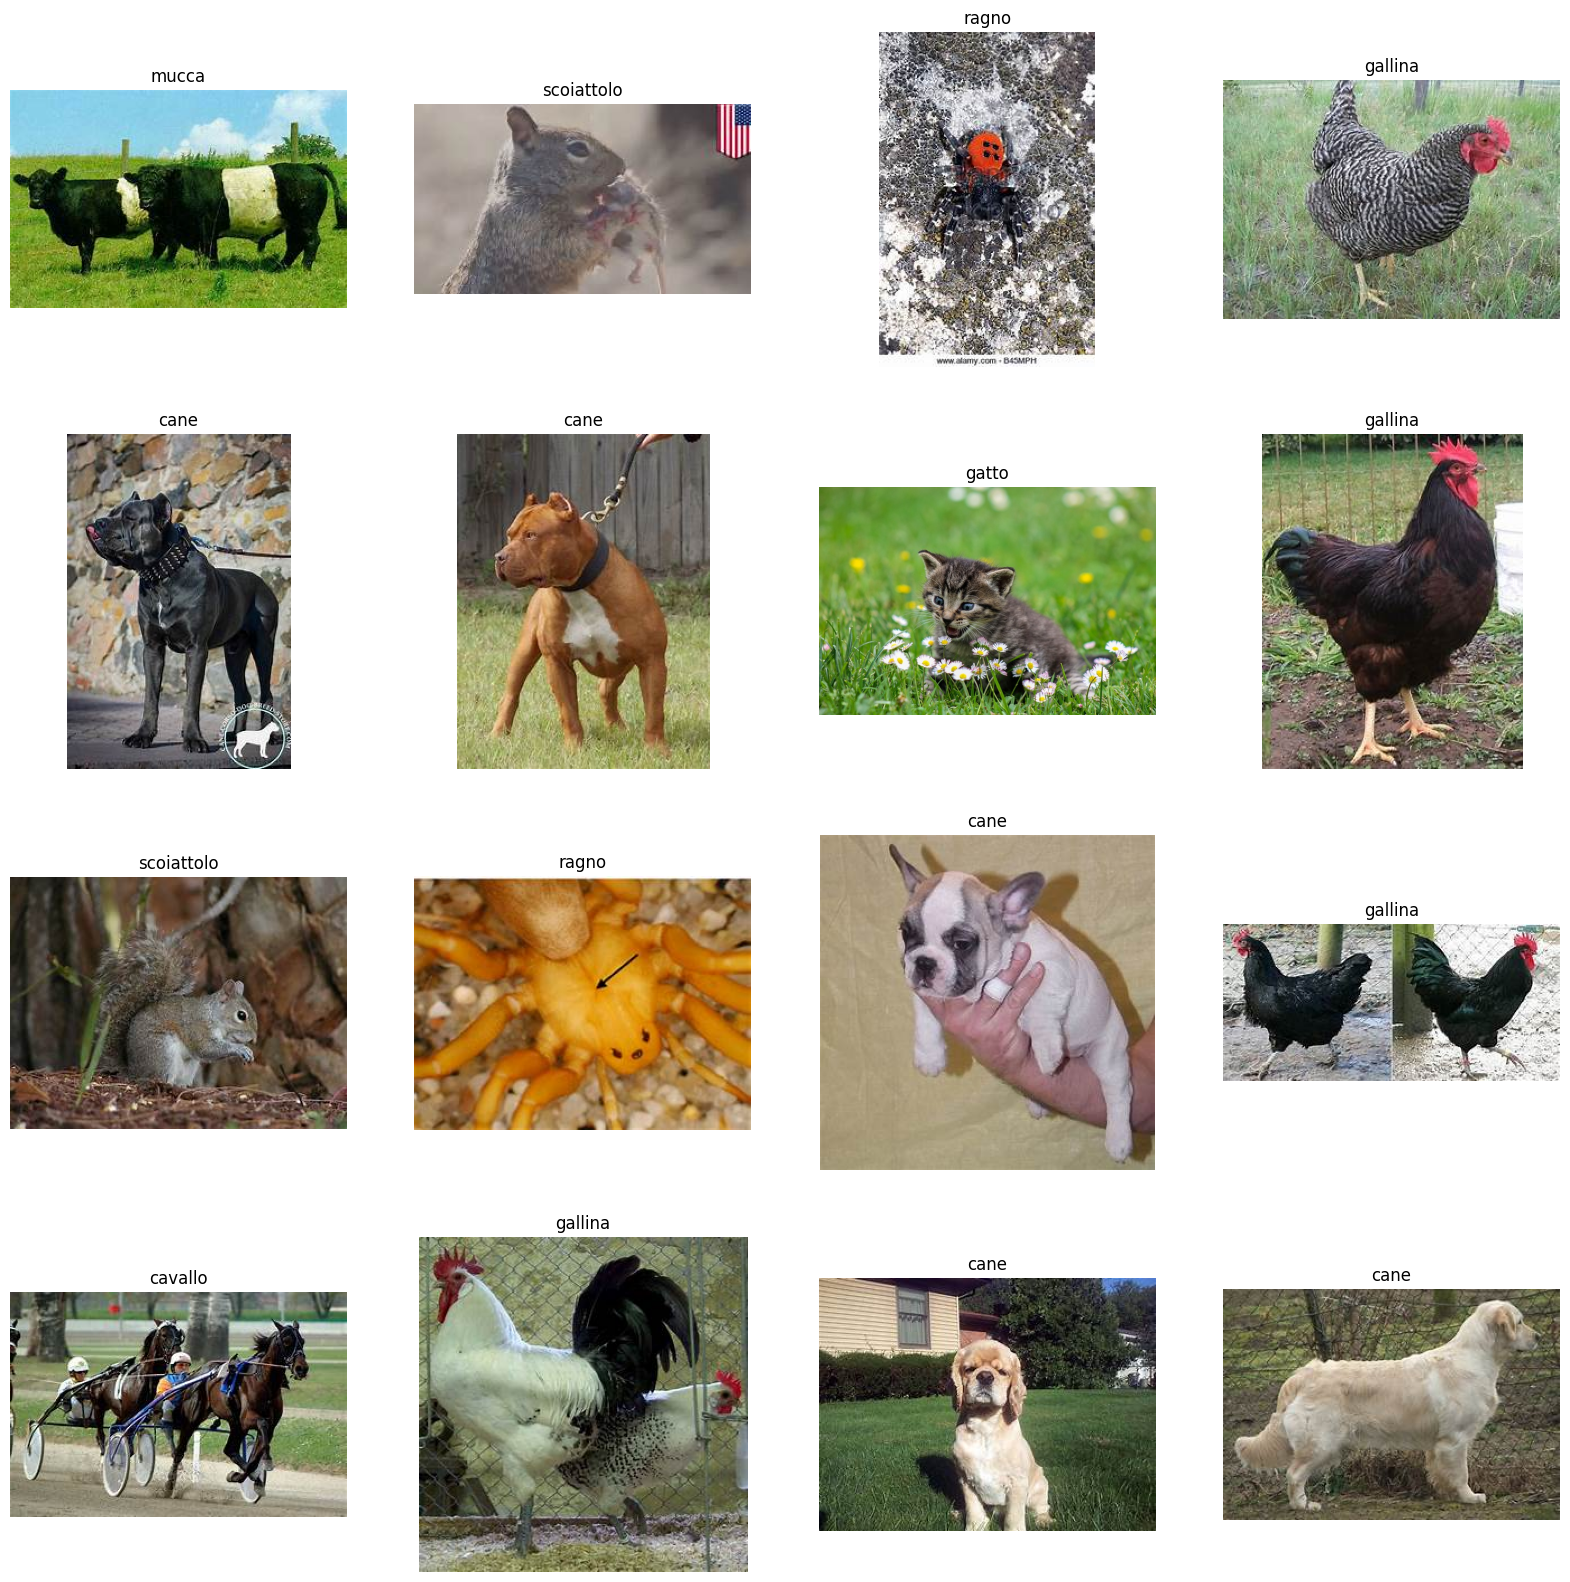

In [ ]:
plt.figure(figsize=(20,20))
for i, row in test_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [ ]:
# Load images and labels
image_size = (224, 224)
batch_size = 32

**Data Preprocessing**

In [ ]:
  # Prepare the data generators
generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

In [ ]:
%%time
# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
)

val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 20943 validated image filenames belonging to 10 classes.
Found 3141 validated image filenames belonging to 10 classes.
Found 2095 validated image filenames belonging to 10 classes.
CPU times: user 199 ms, sys: 90.8 ms, total: 290 ms
Wall time: 297 ms


**Model Structure**


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.EfficientNetB2(
    input_shape=(224, 224, 3),
    include_top=False, # we don`t need a pre-trained top layer (output layer)
    weights='imagenet',
    pooling='max'
)

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

31790344/31790344 [==============================] - 0s 0us/step


**Model Building**

In [ ]:
# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
], name='AugmentationLayer')


In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                        

In [ ]:
model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.tf",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_images,
    epochs=10,
    validation_data=val_images,
    callbacks=callbacks)

Epoch 1/10
655/655 [==============================] - 69s 83ms/step - loss: 2.1606 - accuracy: 0.2300 - val_loss: 2.0193 - val_accuracy: 0.3002
Epoch 2/10
655/655 [==============================] - 51s 78ms/step - loss: 1.8906 - accuracy: 0.3501 - val_loss: 1.8371 - val_accuracy: 0.3690
Epoch 3/10
655/655 [==============================] - 51s 78ms/step - loss: 1.7711 - accuracy: 0.3998 - val_loss: 1.7465 - val_accuracy: 0.4024
Epoch 4/10
655/655 [==============================] - 56s 86ms/step - loss: 1.6930 - accuracy: 0.4293 - val_loss: 1.6928 - val_accuracy: 0.4241
Epoch 5/10
655/655 [==============================] - 51s 78ms/step - loss: 1.6305 - accuracy: 0.4528 - val_loss: 1.6351 - val_accuracy: 0.4413
Epoch 6/10
655/655 [==============================] - 51s 77ms/step - loss: 1.5761 - accuracy: 0.4697 - val_loss: 1.6016 - val_accuracy: 0.4597
Epoch 7/10
655/655 [==============================] - 52s 80ms/step - loss: 1.5309 - accuracy: 0.4857 - val_loss: 1.5660 - val_accuracy:

**Display model performance**

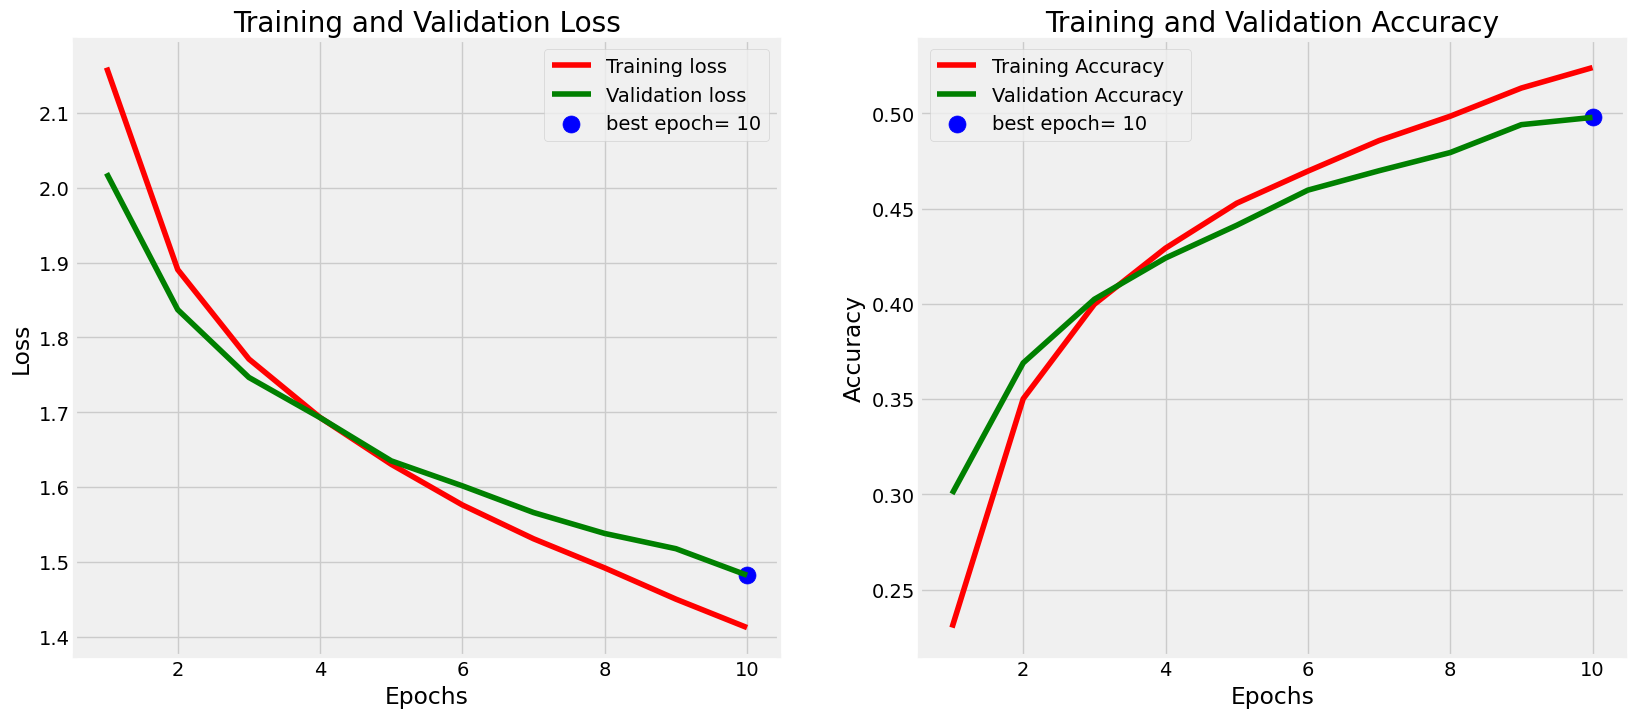

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

**Save the Model**

In [ ]:
model.save('content/my_model2.h5')

In [ ]:
from keras.models import load_model
my_model = load_model('content/my_model2.h5')

**Model Evaluation**

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.45162
Test Accuracy: 50.50%


**F1 Score / Recall / Precision**

In [ ]:
from sklearn.metrics import classification_report, f1_score , confusion_matrix
y_true = test_images.classes
y_pred = np.argmax(model.predict(test_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))

66/66 [==============================] - 5s 74ms/step
F1 Score: 0.43941702747652894
              precision    recall  f1-score   support

        cane       0.47      0.76      0.58       407
     cavallo       0.57      0.51      0.54       203
    elefante       0.41      0.30      0.35       115
    farfalla       0.53      0.73      0.61       157
     gallina       0.72      0.31      0.43       268
       gatto       0.40      0.11      0.18       140
       mucca       0.43      0.25      0.31       163
      pecora       0.50      0.40      0.45       146
       ragno       0.54      0.72      0.62       357
  scoiattolo       0.37      0.29      0.33       139

    accuracy                           0.51      2095
   macro avg       0.49      0.44      0.44      2095
weighted avg       0.51      0.51      0.48      2095



**save Model**

In [ ]:
saved_model_path = "my_model2.h5"   #set path for your model
model.save(saved_model_path)

In [ ]:
from keras.models import load_model
my_model = load_model('my_model2.h5')

In [ ]:
from google.colab import files
files.download('my_model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Evaluate Model**

In [ ]:
test_loss, test_acc = my_model.evaluate(test_images)
print(f"Test accuracy: {test_acc:.3f}")

66/66 [==============================] - 5s 76ms/step - loss: 1.4516 - accuracy: 0.5050
Test accuracy: 0.505
